Name: Vrushaket P. Chaudhari

Roll No: 31305

Class : TE-03

Batch : K3

Subject : DSBDAL

Assignment : 2. Data Wrangling II

## Data Wrangling II
### Perform the following operations using Python on any open source dataset (eg. data.csv)
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them. 

2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 

3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. 

Reason and document your approach properly

## Import all the required Python Libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset into pandas data frame.

In [3]:
from pandas import read_csv
df = read_csv('StudentsPerformance_modified.csv')

In [4]:
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course math score  reading score  writing score  
0                      none         72           72.0           74.0  
1                 completed        NaN           90.0           88.0  
2                      none         90           95.0           93.0  
3                      none         47           57.0           44.0  
4                      none         76           78.0           75.0  
..                      ...        ...            ...            ...  
995               completed         88           99.0           95.0  
996                    none         62           55.0           55.0  
997               completed         59           71.0           65.0  
998               completed         68           78.0           77.0  
999                    none         77           86.0           86.0  

[1000 rows x 8 columns]

In [5]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course math score  reading score  writing score  
0                    none         72           72.0           74.0  
1               completed        NaN           90.0           88.0  
2                    none         90           95.0           93.0  
3                    none         47           57.0           44.0  
4                    none         76           78.0           75.0

### 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [6]:
df['math score'].dtype

dtype('O')

In [7]:
df = df.replace("?", np.NaN)
df['math score'] = df['math score'].astype('float64')
df['math score']

0      72.0
1       NaN
2      90.0
3      47.0
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math score, Length: 1000, dtype: float64

In [8]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     44
reading score                   6
writing score                   9
dtype: int64

<AxesSubplot:>

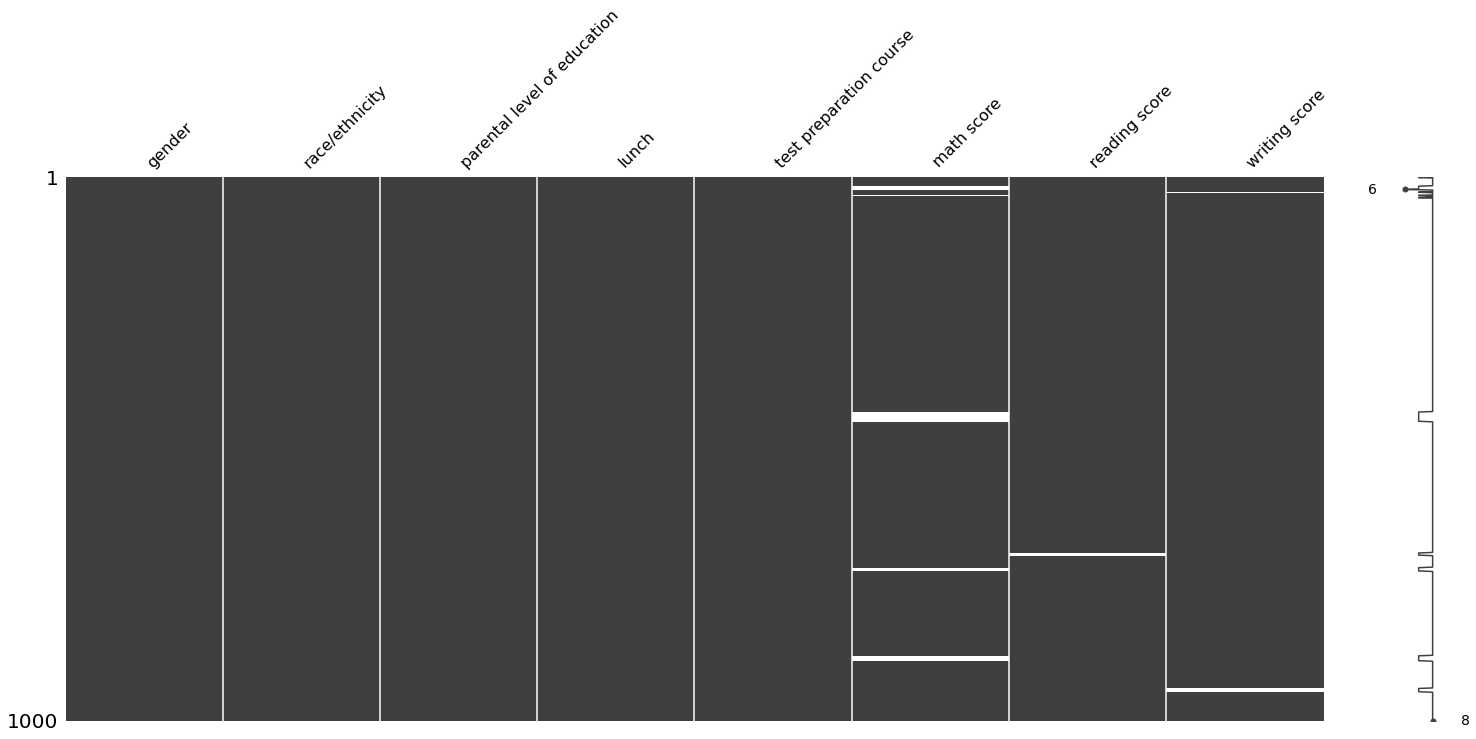

In [9]:
import missingno as msno
msno.matrix(df)

In [10]:
df['math score'].replace(np.NaN, df['math score'].median(), inplace=True)
df['reading score'].replace(np.NaN, df['reading score'].median(), inplace=True)
df['writing score'].replace(np.NaN, df['writing score'].median(), inplace=True)

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

C:\Users\Vrushaket\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

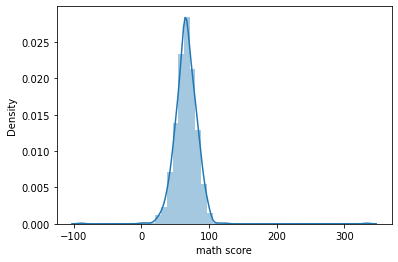

In [12]:
sns.distplot(df['math score'])

C:\Users\Vrushaket\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

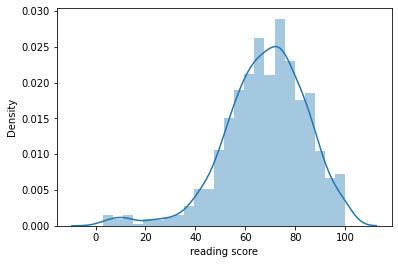

In [13]:
sns.distplot(df['reading score'])

C:\Users\Vrushaket\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

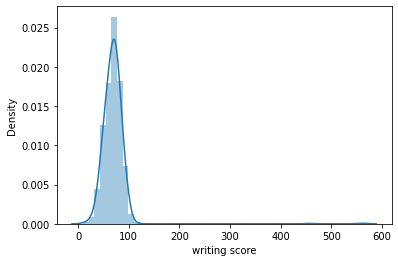

In [14]:
sns.distplot(df['writing score'])

### 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


<AxesSubplot:>

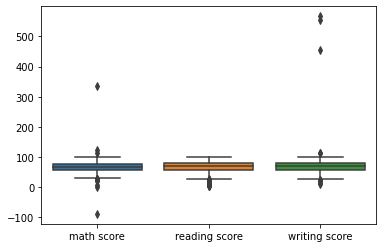

In [16]:
sns.boxplot(data=df)  ## Outliers in Numerical Columns

In [17]:
math_score = df['math score'].values         
math_score = np.sort(math_score)
math_score_Q1 = math_score[250]
math_score_Q2 = math_score[500] 
math_score_Q3 = math_score[750]    
math_score_Q1,math_score_Q2,math_score_Q3

(57.0, 66.0, 76.0)

In [18]:
Q1 = int((math_score.size +1) * 1/4)     # lower quartile
Q2 = int((math_score.size +1) * 2/4)     # middle quartile
Q3 = int((math_score.size +1) * 3/4)     # upper quartile
math_score[Q1], math_score[Q2], math_score[Q3]

(57.0, 66.0, 76.0)

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

Q1, Q3

(math score       57.0
 reading score    58.0
 writing score    58.0
 Name: 0.25, dtype: float64,
 math score       76.0
 reading score    79.0
 writing score    79.0
 Name: 0.75, dtype: float64)

In [20]:
IQR = Q3 - Q1
IQR

math score       19.0
reading score    21.0
writing score    21.0
dtype: float64

In [21]:
high = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR

high, low

(math score       104.5
 reading score    110.5
 writing score    110.5
 dtype: float64,
 math score       28.5
 reading score    26.5
 writing score    26.5
 dtype: float64)

In [22]:
df[((df<low)|(df>high)).any(axis=1)]    # rows with outliers

C:\Users\VRUSHA~1\AppData\Local\Temp/ipykernel_8532/3539895959.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[((df<low)|(df>high)).any(axis=1)]    # rows with outliers


gender race/ethnicity parental level of education         lunch  \
18     male        group C             master's degree  free/reduced   
19   female        group C          associate's degree  free/reduced   
20     male        group D                 high school      standard   
21   female        group B                some college  free/reduced   
22     male        group D                some college      standard   
23   female        group C            some high school      standard   
24     male        group D           bachelor's degree  free/reduced   
25     male        group A             master's degree  free/reduced   
26     male        group B                some college      standard   
27   female        group C           bachelor's degree      standard   
28     male        group C                 high school      standard   
29   female        group D             master's degree      standard   
30   female        group D                some college      standard   
31   female        group B                some college      standard   
33     male        group D                some college      standard   
34     male        group E                some college      standard   
35     male        group E          associate's degree      standard   
36   female        group D          associate's degree      standard   
37   female        group D            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
76     male        group E            some high school      standard   
91     male        group C                 high school  free/reduced   
145  female        group C                some college  free/reduced   
327    male        group A                some college  free/reduced   
338  female        group B            some high school  free/reduced   
363  female        group D            some high school  free/reduced   
420  female        group C          associate's degree  free/reduced   
431  female        group C                 high school      standard   
456  female        group D           bachelor's degree      standard   
459    male        group B                 high school      standard   
465  female        group C                some college      standard   
466  female        group D          associate's degree  free/reduced   
474  female        group B          associate's degree      standard   
542  female        group C          associate's degree      standard   
591    male        group A            some high school      standard   
596    male        group B                 high school  free/reduced   
651  female        group A                 high school      standard   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
18                completed        66.0           22.0           46.0  
19                     none        66.0           22.0           61.0  
20                     none        66.0           12.0           63.0  
21                completed        66.0           12.0           70.0  
22                     none        66.0           13.0           53.0  
23                     none        66.0           14.0           69.0  
24                completed        74.0            9.0           80.0  
25                     none        73.0            8.0           72.0  
26                     none        69.0            7.0           55.0  
27                     none        67.0            6.0           75.0  
28                     none        70.0            4.0           69.0  
29                     none        62.0            3.0           75.0  
30                     none        69.0            5.0           74.0  
31                     none        63.0     

In [23]:
df = df[~((df<low)|(df>high)).any(axis=1)]

C:\Users\VRUSHA~1\AppData\Local\Temp/ipykernel_8532/1013426065.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<low)|(df>high)).any(axis=1)]


In [24]:
df.shape

(960, 8)

<AxesSubplot:>

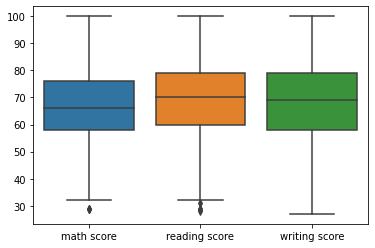

In [25]:
sns.boxplot(data=df)

### Convert Categorical Columns to Quantitative Values

In [26]:
categorical_cols = df.select_dtypes(include=['object'])

In [27]:
categorical_dummies = pd.get_dummies(categorical_cols)
categorical_dummies

gender_female  gender_male  race/ethnicity_group A  \
0                1            0                       0   
1                1            0                       0   
2                1            0                       0   
3                0            1                       1   
4                0            1                       0   
..             ...          ...                     ...   
995              1            0                       0   
996              0            1                       0   
997              1            0                       0   
998              1            0                       0   
999              1            0                       0   

     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                         1                       0                       0   
1                         0                       1                       0   
2                         1                       0                       0   
3                         0                       0                       0   
4                         0                       1                       0   
..                      ...                     ...                     ...   
995                       0                       0                       0   
996                       0                       1                       0   
997                       0                       1                       0   
998                       0                       0                       1   
999                       0                       0                       1   

     race/ethnicity_group E  parental level of education_associate's degree  \
0                         0                                               0   
1                         0                                               0   
2                         0                                               0   
3                         0                                               1   
4                         0                                               0   
..                      ...                                             ...   
995                       1                                               0   
996                       0                                               0   
997                       0                                               0   
998                       0                                               0   
999                       0                                               0   

     parental level of education_bachelor's degree  \
0                                                1   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
..                                             ...   
995                                              0   
996                                              0   
997                                              0   
998                                              0   
999                                              0   

     parental level of education_high school  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
995                                        0   
996                                        1   
997                                        1   
998                                        0   
999                                        0   

     parental level of education_master's degree  \
0                                              0   
1                                              0   
2               

In [28]:
df = df.drop(list(categorical_cols.columns), axis=1)
df = pd.concat([categorical_dummies, df], axis=1)

In [29]:
df.shape

(960, 20)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   gender_female                                   960 non-null    uint8  
 1   gender_male                                     960 non-null    uint8  
 2   race/ethnicity_group A                          960 non-null    uint8  
 3   race/ethnicity_group B                          960 non-null    uint8  
 4   race/ethnicity_group C                          960 non-null    uint8  
 5   race/ethnicity_group D                          960 non-null    uint8  
 6   race/ethnicity_group E                          960 non-null    uint8  
 7   parental level of education_associate's degree  960 non-null    uint8  
 8   parental level of education_bachelor's degree   960 non-null    uint8  
 9   parental level of education_high school    

In [31]:
df

gender_female  gender_male  race/ethnicity_group A  \
0                1            0                       0   
1                1            0                       0   
2                1            0                       0   
3                0            1                       1   
4                0            1                       0   
..             ...          ...                     ...   
995              1            0                       0   
996              0            1                       0   
997              1            0                       0   
998              1            0                       0   
999              1            0                       0   

     race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                         1                       0                       0   
1                         0                       1                       0   
2                         1                       0                       0   
3                         0                       0                       0   
4                         0                       1                       0   
..                      ...                     ...                     ...   
995                       0                       0                       0   
996                       0                       1                       0   
997                       0                       1                       0   
998                       0                       0                       1   
999                       0                       0                       1   

     race/ethnicity_group E  parental level of education_associate's degree  \
0                         0                                               0   
1                         0                                               0   
2                         0                                               0   
3                         0                                               1   
4                         0                                               0   
..                      ...                                             ...   
995                       1                                               0   
996                       0                                               0   
997                       0                                               0   
998                       0                                               0   
999                       0                                               0   

     parental level of education_bachelor's degree  \
0                                                1   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
..                                             ...   
995                                              0   
996                                              0   
997                                              0   
998                                              0   
999                                              0   

     parental level of education_high school  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
995                                        0   
996                                        1   
997                                        1   
998                                        0   
999                                        0   

     parental level of education_master's degree  \
0                                              0   
1                                              0   
2               

### 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

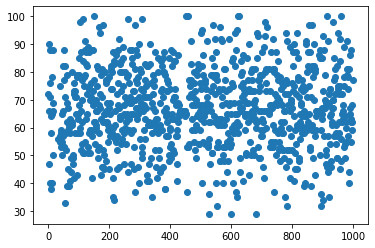

In [32]:
plt.scatter(y = df['math score'], x = df.index)

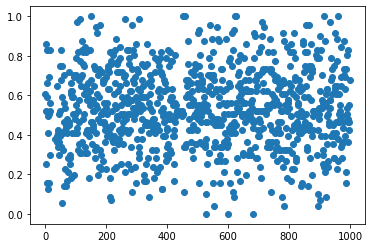

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['math score']] = scaler.fit_transform(df[['math score']])
plt.scatter(y = df['math score'], x = df.index)    # scaled to 0 to 1